# GEOPLOT

Examples: Sankey Diagram, Pointplot, KDE, Choropleth, Cartogram

# NOTES

In [81]:
# for more information and install instructions, visit the python package index and search for geoplot
# one install option is to install all packages into an Anaconda package environment

# IMPORTS

In [82]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

# SANKEY DIAGRAM 

Sankey diagrams are a type of flow diagram in which the width of the lines is proportional to some value.

In [83]:
# AADT = Annual Average Daily Traffic data
# Shapefile on GitHub with geoplot Jupyter notebook
path = 'AADT Shapefile'
roads = gpd.read_file(path)
# some data may need to use a different coordinate reference system (i.e.-to_crs())
roads.to_crs(epsg=4326, inplace=True)
roads.head(2)

,AADT,geometry
0,19520.0,"LINESTRING Z (-86.58623 38.22702 0.00000, -86...."
1,69677.0,"LINESTRING Z (-86.39812 39.98349 0.00000, -86...."


In [84]:
type(roads)

geopandas.geodataframe.GeoDataFrame

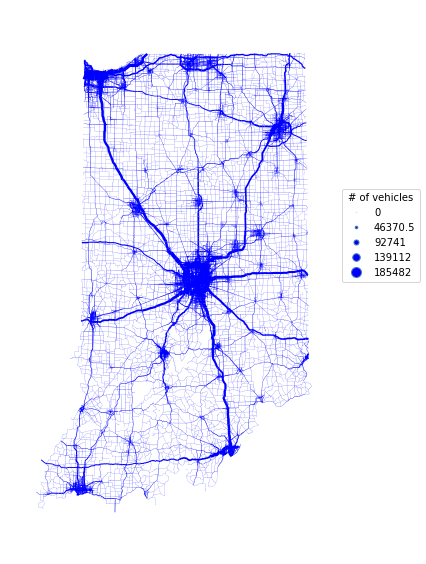

In [85]:
# sankey plot showing annual average daily traffic (scale=AADT)
# this can take several minutes to run
gplt.sankey(df=roads, 
            projection=gcrs.AlbersEqualArea(),
            scale='AADT', 
            limits=(0.1, 10), 
            color='blue',
            figsize=(6, 12),
            legend=True,
            legend_kwargs={'loc': (1.0, 0.5), 'title': '# of vehicles'});

Sankey of Napoleon’s March on Moscow

another sankey diagram example from geoplot documentation

Charles Joseph Minard's famous graph showing the decreasing size of the army as it marches to Moscow (brown line, from left to right) and back (black line, from right to left) with the size of the army equal to the width of the line.

In [86]:
napoleon_troop_movements = gpd.read_file(gplt.datasets.get_path('napoleon_troop_movements'))
napoleon_troop_movements.head()

,id,direction,survivors,group,geometry
0,1,0,340000,1,"MULTIPOINT (24.50000 55.00000, 24.00000 54.90000)"
1,2,0,340000,1,"MULTIPOINT (25.50000 54.50000, 24.50000 55.00000)"
2,3,0,320000,1,"MULTIPOINT (26.00000 54.70000, 25.50000 54.50000)"
3,4,0,300000,1,"MULTIPOINT (27.00000 54.80000, 26.00000 54.70000)"
4,5,0,280000,1,"MULTIPOINT (28.00000 54.90000, 27.00000 54.80000)"


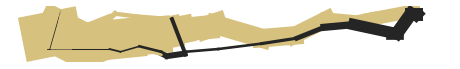

In [87]:
colors = [(215/255, 193/255, 126/255), (37/255, 37/255, 37/255)]
cm = LinearSegmentedColormap.from_list('minard', colors)

gplt.sankey(df=napoleon_troop_movements,
            scale='survivors',
            limits=(0.5, 45),
            hue='direction',
            cmap=cm);

# save
# fig = plt.gcf()
# plt.savefig('minard-napoelon-russia.png', bbox_inches='tight', pad_inches=0.1)

# POINTPLOT

Pointplots are geospatial scatter plots

In [88]:
# pandas dataframe to geopandas dataframe (tallest buildings)
tb_path = 'https://raw.githubusercontent.com/groundhogday321/dataframe-datasets/master/tallest_buildings_with_lat_lon.csv'
tallest_buildings = pd.read_csv(tb_path)
tb_gdf = gpd.GeoDataFrame(tallest_buildings,
                          geometry=gpd.points_from_xy(tallest_buildings.Longitude, tallest_buildings.Latitude))

tb_gdf.head()

,Building,City,Country,Height,Floors,Year,Latitude,Longitude,geometry
0,Burj Khalifa,Dubai,United Arab Emirates,2717,163,2010,25.197031,55.274222,POINT (55.27422 25.19703)
1,Shanghai Tower,Shanghai,China,2073,128,2015,31.235646,121.501266,POINT (121.50127 31.23565)
2,Abraj Al-Bait Clock Tower,Mecca,Saudi Arabia,1971,120,2012,21.419323,39.826697,POINT (39.82670 21.41932)
3,Ping An Finance Center,Shenzhen,China,1965,115,2017,22.536724,114.050355,POINT (114.05036 22.53672)
4,Lotte World Tower,Seoul,South Korea,1819,123,2016,37.511104,127.098233,POINT (127.09823 37.51110)


In [89]:
# geodataframe with geometry for world map
world = gpd.read_file(gplt.datasets.get_path('world'))
world.head()

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


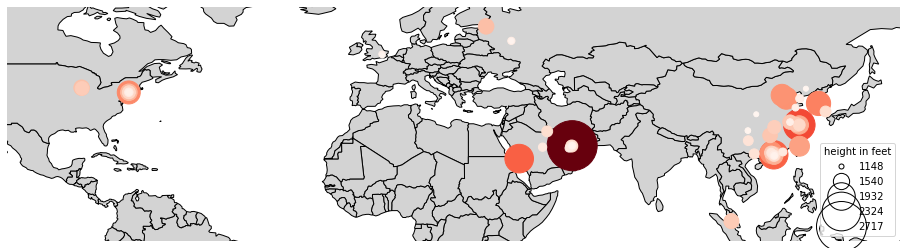

In [90]:
# world map
ax = gplt.polyplot(df=world,
                   linewidth=1,
                   facecolor='lightgray',
                   figsize=(16, 8))

# geospatial scatter plot
gplt.pointplot(df=tb_gdf,
               scale='Height',
               limits=(5, 50),
               hue='Height',
               cmap='Reds',
               legend=True,
               legend_var='scale',
               legend_kwargs={'title': 'height in feet', 'loc': 'lower right'},
               ax=ax);

# KDE
kernel density estimate plot

In [91]:
# load geojson geodataframe with world country outlines
w_path = 'https://raw.githubusercontent.com/groundhogday321/map-layers/main/world.geojson'
world = gpd.read_file(w_path)
world.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


In [92]:
# earthquakes dataframe
eq_path = 'https://raw.githubusercontent.com/groundhogday321/dataframe-datasets/master/earthquakes_data.csv'
earthquakes = pd.read_csv(eq_path)

eq_gdf = gpd.GeoDataFrame(earthquakes,
                          geometry=gpd.points_from_xy(earthquakes.Longitude, earthquakes.Latitude))

eq_gdf.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,geometry
0,1/2/65,13:44:18,19.246,145.616,Earthquake,131.6,6.0,POINT (145.61600 19.24600)
1,1/4/65,11:29:49,1.863,127.352,Earthquake,80.0,5.8,POINT (127.35200 1.86300)
2,1/5/65,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,POINT (-173.97200 -20.57900)
3,1/8/65,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,POINT (-23.55700 -59.07600)
4,1/9/65,13:32:50,11.938,126.427,Earthquake,15.0,5.8,POINT (126.42700 11.93800)


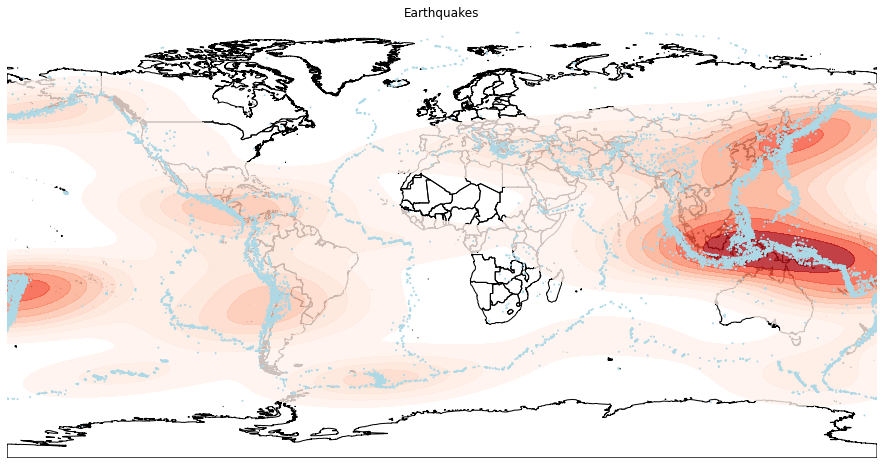

In [95]:
import warnings
warnings.filterwarnings('ignore')

# world map
ax = gplt.polyplot(df=world, figsize=(16, 8))

# kernel density estimate plot
gplt.kdeplot(df=eq_gdf, cmap='Reds', shade=True, alpha=0.8, figsize=(16, 8), ax=ax)

# geospatial scatter plot
gplt.pointplot(df=eq_gdf, s=1, color='lightblue', ax=ax)

plt.title('Earthquakes');

# CHOROPLETH

In [96]:
# us states geodataframe (contiguous states only)
# gdp (gross domestic product) data source: Wikipedia, Bureau of Economic Analysis
us_states_path = 'https://raw.githubusercontent.com/groundhogday321/map-layers/main/us_states.geojson'
us_states = gpd.read_file(us_states_path)
us_states.head()

,state,population,gdp,geometry
0,Minnesota,5303925,379388000000,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,989415,51934000000,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,672591,54044000000,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,1567582,85552000000,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,6724540,632013000000,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


In [97]:
# scaled population
choropleth_data = us_states.copy()
choropleth_data['population_in_millions'] = choropleth_data['population']/1_000_000
choropleth_data.head()

,state,population,gdp,geometry,population_in_millions
0,Minnesota,5303925,379388000000,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",5.303925
1,Montana,989415,51934000000,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",0.989415
2,North Dakota,672591,54044000000,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",0.672591
3,Idaho,1567582,85552000000,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",1.567582
4,Washington,6724540,632013000000,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",6.724540


In [98]:
choropleth_data.sort_values(by='population').tail(1)

,state,population,gdp,geometry,population_in_millions
6,California,37253956,3120386000000,"POLYGON ((-114.35490 34.46467, -114.16597 34.2...",37.253956


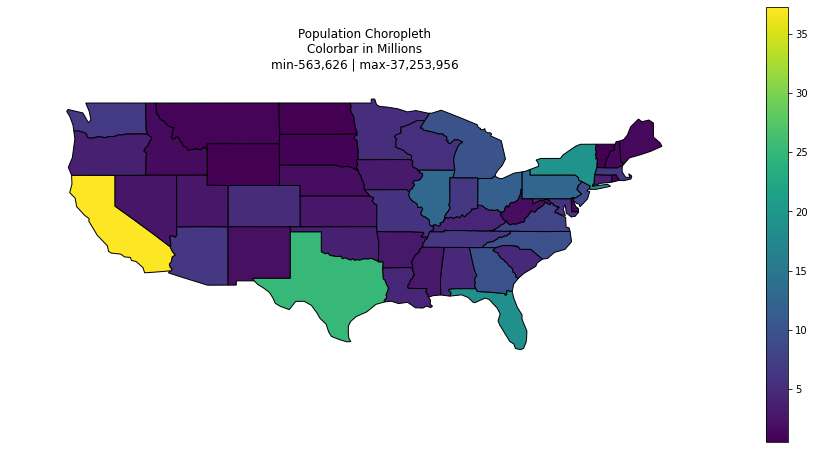

In [99]:
# choropleth map by state population
gplt.choropleth(df=choropleth_data, 
                hue='population_in_millions', 
                figsize=(16, 8), 
                legend=True);

plt.title('Population Choropleth\nColorbar in Millions\nmin-563,626 | max-37,253,956');

# CARTOGRAM

A cartogram distorts (grows or shrinks) polygons on a map according to the magnitude of some input data.

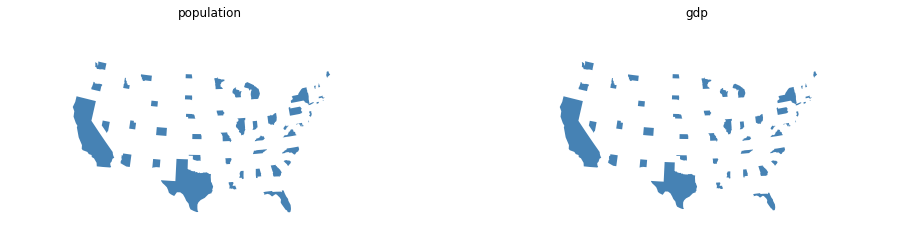

In [100]:
# create figure and subplots
proj = gcrs.AlbersEqualArea(central_latitude=40, central_longitude=-97)
fig = plt.figure(figsize=(16, 8))
ax1 = plt.subplot(121, projection=proj)
ax2 = plt.subplot(122, projection=proj)

# cartogram for population
population = gplt.cartogram(df=us_states,
                            scale='population',
                            projection=gcrs.AlbersEqualArea(),
                            ax=ax1)

population.set_title('population')

gdp = gplt.cartogram(df=us_states,
                     scale='gdp',
                     projection=gcrs.AlbersEqualArea(),
                     ax=ax2)

gdp.set_title('gdp');